<a href="https://colab.research.google.com/github/Letycia-Locha/ELT_integrado/blob/main/PipelineMulheresNaTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Pipeline ELT Integrado [WoMarkersCode] -**
##**Usando Dados para Entender o Cenário da Mulher na Tecnologia Mundial**
Editado e complementado por - Letycia Locha

![imagem](https://forbes.com.br/wp-content/uploads/2021/07/carreira_mulherestecnologia_abre_8julho_dowell.jpg)

##Material de análise: Base de Dados do Kaggle - Analytcs Competition - Machine Learning & Data Science Survey

Link para acesso: https://www.kaggle.com/competitions/kaggle-survey-2022

##Perguntas a serem respondidas após o processo de ELT e Análise:
* Quantas Mulheres participaram da Pesquisa do Kaggle em 2022?
* Qual a média salarial (em dólares) por anos de experiência?
* Quais os bancos de dados mais utilizados?
* Quantas mulheres utilizam linguagens de dados (Python, SQL e R)?
* Quantas mulheres são do Brasil? E do continente americano?


##**1. Configurando o Ambiente**

###1.1 - Instalação e Importação

In [2]:
!pip install pandas prefect dbt-sqlite requests -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.4/114.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.7/167.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 986.2/986.2 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.2/351.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

###Explicando a celula acima

* Instalação das bibliotecas necessárias para a execução do projeto
* `-q` é útil para ocultar a saída e não poluir o notebook

In [3]:
import pandas as pd
import requests
import json
import sqlite3 as sqlite3

print("Ambiente configurado com sucesso!")

Ambiente configurado com sucesso!


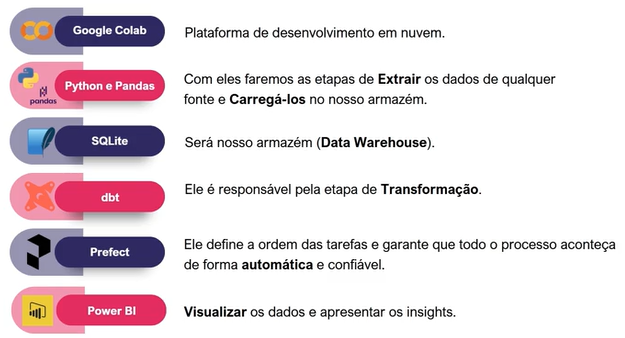

###1.2 - Fonte de Dados `CSV`

Arquivo do Kaggle apenas com mulheres (*perspectiva global*)

In [4]:
!wget -O kaggle_survey_2022.csv "https://raw.githubusercontent.com/paulalcssantos/Desafio-Pipeline-WoMakersCode/refs/heads/main/kaggle_survey_2022_mulheres_dados.csv"

--2025-12-01 23:51:20--  https://raw.githubusercontent.com/paulalcssantos/Desafio-Pipeline-WoMakersCode/refs/heads/main/kaggle_survey_2022_mulheres_dados.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103121 (101K) [text/plain]
Saving to: ‘kaggle_survey_2022.csv’

kaggle_survey_2022. 100%[===================>] 100.70K  --.-KB/s    in 0.009s  

2025-12-01 23:51:20 (10.5 MB/s) - ‘kaggle_survey_2022.csv’ saved [103121/103121]



###Explicando a célula acima:
*   `!wget`: O ! no início indica que este é um comando de shell a ser executado no ambiente do notebook (como se fosse um terminal).
* `-O kaggle_survey_2022.csv` : O -O (maiúsculo) significa "output document to file" (salvar o documento no arquivo). Ele especifica o nome que o arquivo baixado terá. Neste caso, o arquivo será salvo como kaggle_survey_2022.csv.
* `"https://raw.githubusercontent.com/paulalcssantos/Desafio-Pipeline-WoMakersCode/refs/heads/main/kaggle_survey_2022_mulheres_dados.csv"`: Esta é a URL direta do arquivo que será baixado. É um arquivo CSV hospedado no GitHub, contendo dados de uma pesquisa do Kaggle, filtrados por mulheres na área de dados.

###1.3 - Fonte de Dados `SQL`

Criando e populando nosso banco de dados de origem (`SQL`)

In [5]:
conn_bootcamp = sqlite3.connect("bootcampBI.db")
cursor_bootcamp = conn_bootcamp.cursor()

cursor_bootcamp.execute('''
CREATE TABLE IF NOT EXISTS PARTICIPANTES (
  ID_PARTICIPANTE INT,
  NOME VARCHAR(150),
  PAIS_ORIGEM VARCHAR(100)
)

''')

participantes = [
    (1, 'Maria', "Brazil"),
    (2, 'Luana', 'Portugal'),
    (3, 'Camila', 'Brazil'),
    (4, 'Luiza', 'Argentina'),
    (5, 'Silvia', 'Colombia'),
    (6, 'Paola', 'Brazil'),
    (7, 'Vitoria', 'Mexico'),
    (8, 'Caroline', 'Argentina'),
    (9, 'Marta', 'Portugal'),
    (10, 'Ana', 'Brazi')
]

cursor_bootcamp.executemany('INSERT INTO PARTICIPANTES VALUES (?,?,?)', participantes)

conn_bootcamp.commit()
conn_bootcamp.close()

print("Banco de Dados e tabela criados com sucesso!")

Banco de Dados e tabela criados com sucesso!


###Explicando a célula acima:


* `conn_bootcamp = sqlite3.connect("bootcampBI.db")` : Esta linha estabelece uma conexão com um banco de dados SQLite. Se o arquivo bootcampBI.db não existir, ele será criado automaticamente.
* `cursor_bootcamp = conn_bootcamp.cursor()`: Um "cursor" é um objeto que permite executar comandos SQL e buscar resultados. Pense nele como uma interface para interagir com o banco de dados.
* `cursor_bootcamp.execute('''CREATE TABLE IF NOT EXISTS PARTICIPANTES (...)''')`: Este bloco de código SQL cria uma tabela chamada **PARTICIPANTES** dentro do seu banco de dados.
O `IF NOT EXISTS` garante que a tabela só será criada se ainda não existir, evitando erros se você rodar a célula várias vezes. A tabela terá três colunas:
* `ID_PARTICIPANTE` (INT - número inteiro)
* `NOME` (VARCHAR(150) - texto com até 150 caracteres)
* `PAIS_ORIGEM` (VARCHAR(100) - texto com até 100 caracteres)
participantes = [...]: Esta é uma lista de tuplas em Python, onde cada tupla representa uma linha de dados a ser inserida na tabela PARTICIPANTES. Cada tupla contém um ID, um nome e um país de origem.

* `cursor_bootcamp.executemany('INSERT INTO PARTICIPANTES VALUES (?,?,?)', participantes)`: Este comando insere múltiplas linhas de dados na tabela PARTICIPANTES. O executemany é eficiente para inserir vários registros de uma vez. Os ? são placeholders que serão preenchidos com os valores da lista participantes.
* `conn_bootcamp.commit()`: Após realizar alterações no banco de dados (como criar tabelas ou inserir dados), é fundamental "comitar" (salvar) essas mudanças. Sem este comando, as alterações não seriam permanentes.

* `conn_bootcamp.close()`: É uma boa prática fechar a conexão com o banco de dados quando você termina de usá-lo para liberar recursos.

* `print("Banco de Dados e tabela criados com sucesso!"`: Por fim, uma mensagem de confirmação é exibida para indicar que a operação foi concluída.

###1.4 - Fonte de Dados `JSON`

Dados semiestruturados

In [6]:
%%writefile habilidades_categorias.json
{
  "Ferramentas de Análise": ["Python", "R", "SQL"],
  "Ferramentas de BI": ["Power Bi", "Tableau", "Looker"],
  "Plataformas de Nuvem": ["AWS", "Google Cloud", "Microsoft Azure"]
}

Writing habilidades_categorias.json


###Explicando a célula acima:

* `%%writefile habilidades_categorias.json`: Este é um magic command do Jupyter/Colab. Ele indica que o conteúdo que segue (até a próxima célula ou o final do input) deve ser gravado em um arquivo chamado habilidades_categorias.json.

O conteúdo dentro do bloco é um objeto JSON. Ele define um mapeamento de categorias de habilidades para listas de habilidades específicas. Por exemplo:

1. "Ferramentas de Análise" é uma categoria que inclui ["Python", "R", "SQL"].

2. "Ferramentas de BI" é outra categoria com ["Power Bi", "Tableau", "Looker"].

3. E "Plataformas de Nuvem" lista ["AWS", "Google Cloud", "Microsoft Azure"].

Basicamente, você está criando um arquivo habilidades_categorias.json no seu ambiente do Colab com essas informações sobre categorias e suas respectivas habilidades.

###1.4 - Data Warehouse

Criando o arquivo do o **Data Warehouse**

In [7]:
conn_datawarehouse = sqlite3.connect('data_warehouse.db')
conn_datawarehouse.close()

print("Data Warehouse criado com sucesso!")

Data Warehouse criado com sucesso!


###Explicando a célula acima:

* `conn_datawarehouse = sqlite3.connect('data_warehouse.db')`: Esta linha tenta estabelecer uma conexão com um banco de dados SQLite chamado data_warehouse.db.
*O ponto chave aqui é que, se este arquivo de banco de dados (data_warehouse.db) ainda não existir no seu ambiente, a biblioteca sqlite3 o criará automaticamente ao tentar se conectar.*

* `conn_datawarehouse.close()`: Após tentar a conexão (e, se necessário, criar o arquivo), esta linha fecha imediatamente a conexão com o banco de dados.
*Como o objetivo principal era garantir a existência do arquivo, não precisamos manter a conexão aberta neste momento.*

* `print("Data Warehouse criado com sucesso!")`: Por fim, é exibida uma mensagem de confirmação para informar que o processo foi concluído.

**Em resumo, o principal propósito desta célula é garantir que o arquivo data_warehouse.db exista no seu sistema de arquivos, preparando o local onde seus dados transformados serão armazenados. Ele age como um passo de inicialização para o seu Data Warehouse.**




---






##**2. Extração e Carregamento - `CSV` e `SQL`**

###Três regras principais

* Modularidade
* Logging
* Tratamento de Erros

###2.1 - Configuração do Logger

In [8]:
import logging

Registrando mensagens de nível INFO e acima em um arquivo chamado *'pipeline.log'* e criando um objeto logger para usar em nossas funções

In [9]:
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filename='pipeline.log',
    filemode='w'
)

logger = logging.getLogger()

print("Logging configurado com sucesso!")

Logging configurado com sucesso!


###Explicando a célula acima

* `logging.basicConfig(...)`: Esta função configura as opções básicas do sistema de log:
    * `level=logging.INFO`: Define o nível mínimo de mensagens que serão registradas. Ou seja, apenas mensagens com nível de informação (INFO) ou mais graves (como `WARNING`, `ERROR`, `CRITICAL`) serão capturadas e salvas. Mensagens de `DEBUG` (que são mais detalhadas) não serão incluídas.
    * `format='%(asctime)s - %(levelname)s - %(message)s'`: Especifica o formato que as mensagens de log terão. Ele incluirá:
        * `%(asctime)s`: A data e hora em que a mensagem foi registrada.
        * `%(levelname)s`: O nível da mensagem (ex: 'INFO', 'ERROR').
        * `%(message)s`: O texto da sua mensagem de log.
    * `filename='pipeline.log'`: Indica que todas as mensagens de log configuradas serão escritas em um arquivo chamado `pipeline.log`.
    * `filemode='w'`: Define o modo de abertura do arquivo. `'w'` significa 'write' (escrita), o que fará com que o arquivo `pipeline.log` seja **sobrescrito** toda vez que o script for executado. Se você quisesse adicionar as novas mensagens ao final do arquivo existente, usaria `'a'` (append).

* `logger = logging.getLogger()`: Obtém a instância do logger raiz. Após `basicConfig` ser chamado, este `logger` estará configurado para usar as definições acima. É ele que você usará nas suas funções para registrar mensagens (ex: `logger.info("Minha mensagem")`).

* `print("Logging configurado com sucesso!")`: Simplesmente imprime uma mensagem de confirmação no console para indicar que a configuração do log foi concluída.

**Em resumo**, este código está preparando o ambiente para que as mensagens importantes geradas durante a execução do seu pipeline sejam capturadas, formatadas e salvas em um arquivo `pipeline.log`, ajudando no rastreamento e na identificação de problemas.

###2.2 - Extração de dados de um Arquivo `CSV`

In [10]:
def extrair_dados_kaggle(caminho_arquivo):
  try:
    logger.info(f"Inicando a extração do arquivo: {caminho_arquivo}")

    df = pd.read_csv(caminho_arquivo)

    logger.info(f"Extração do CSV concluída. {len(df)} linhas lidas e {len(df.columns)} colunas.")

    # Boa prática para verificar os tipos de dados que o Pandas encontrou
    logger.info(f"Tipos de dados das colunas: \n{df.dtypes}")

    return df

  except FileNotFoundError:
    logger.error(f"Arquivo não encontrado: {caminho_arquivo}")
    return None
  except Exception as e:
    logger.error(f"Ocorreu um erro inesperado ao extrair os dados: {e}")
    return None

#Teste da função
df_kaggle = extrair_dados_kaggle("kaggle_survey_2022.csv")

if df_kaggle is not None:
  display(df_kaggle.head())


,idade,genero,pais,nivel_educacional,anos_programando,cargo_atual,anos_usando_ml,salario_anual_usd,linguagens_usadas,bancos_de_dados_usados,ferramentas_bi_usadas
0,30-34,Woman,Pakistan,Professional doctorate,5-10 years,Data Scientist,Other,NaN,NaN,NaN,NaN
1,35-39,Woman,Nigeria,Master’s degree,< 1 years,"Data Analyst (Business, Marketing, Financial, ...",Non-profit/Service,$0-999,Python;R;SQL,NaN,NaN
2,25-29,Woman,Germany,Bachelor’s degree,3-5 years,"Data Analyst (Business, Marketing, Financial, ...",Computers/Technology,$0-999,Python;SQL,NaN,NaN
3,30-34,Woman,Tunisia,Master’s degree,< 1 years,Data Scientist,Academics/Education,$0-999,Python,NaN,NaN
4,45-49,Woman,Egypt,Doctoral degree,10-20 years,Data Administrator,Computers/Technology,"10,000-14,999",Python;SQL,PostgreSQL;SQLite;Oracle Database;Snowflake,Qlik Sense


###2.3 - Extração de Dados de um Banco `SQL`

In [11]:
def extrair_dados_sql(caminho_banco):
  try:
    logger.info(f"Inicando a extração do banco de dados: {caminho_banco}")

    conexao = sqlite3.connect(caminho_banco)

    query = "SELECT * FROM PARTICIPANTES"

    df = pd.read_sql_query(query, conexao)

    logger.info(f"Extração do banco de dados concluída com sucesso!")
    return df

  except sqlite3.Error as e:
    logger.error(f"Ocorreu um erro ao conectar ao banco de dados")
    return None
  except Exception as e:
    logger.error(f"Ocorreu um erro inesperado ao extrair os dados: {e}")
    return None

  # O finally garante que a conexão com o banco seja sempre fechada, mesmo se der erro
  finally:
    if conexao:
      conexao.close()
      logger.info("Conexão com o banco de dados fechada.")

#Teste da função
df_participantes = extrair_dados_sql("bootcampBI.db")

if df_participantes is not None:
  display(df_participantes.head())

,ID_PARTICIPANTE,NOME,PAIS_ORIGEM
0,1,Maria,Brazil
1,2,Luana,Portugal
2,3,Camila,Brazil
3,4,Luiza,Argentina
4,5,Silvia,Colombia


###2.4 - Função de Carregamento dos Dados

In [12]:
def carregar_dados(df, nome_tabela, caminho_dw):
  if df is None:
    logger.warning("DataFrame vazio. Nada a ser carregado.")
    return

  try:
    logger.info(f"Iniciando o carregamento dos dados na tabela: {nome_tabela}")

    conexao_dw = sqlite3.connect(caminho_dw)

    df.to_sql(nome_tabela, conexao_dw, if_exists='replace', index=False)

    logger.info(f"Carga para a tabela '{nome_tabela}' concluída com sucesso!")

  except Exception as e:
      logger.error(f"Ocorreu um erro ao carregar os dados para a tabela '{nome_tabela}': {e}")

  finally:
    if conexao_dw:
      conexao_dw.close()
      logger.info("Conexão com o Data Warehouse fechada.")

print("Função de carregamento de dados pronta!")

Função de carregamento de dados pronta!


Executa a carga dos DataFrames extraídos

In [ ]:
carregar_dados(df_kaggle, "kaggle_survey", "data_warehouse.db")
carregar_dados(df_participantes, "participantes", "data_warehouse.db")

##**3.Extração e Carregamento - `API` e `JSON`**

###3.1 -  Extração de Dados de uma API Web

In [13]:
def extrair_dados_paises_api(url_api):
  try:
    logger.info(f"Iniciando a requisição à API: {url_api}")

    resposta = requests.get(url_api)

    if resposta.status_code == 200:
      dados_json = resposta.json()
      logger.info(f"Dados da API extraídos com sucessos. {len(dados_json)} registros de países.")
      return dados_json
    else:
      logger.error(f"Falha na requisição à API. Código de status: {resposta.status_code}")
      return None

  except Exception as e:
      logger.error(f"Ocorreu um erro inesperado ao extrair os dados")
      return None

url_paises = "https://restcountries.com/v3.1/all?fields=name,cca3,region"

#Teste da função
dados_paises = extrair_dados_paises_api(url_paises)

if dados_paises is not None:
  df_paises = pd.json_normalize(dados_paises)
  display(df_paises.head())

,cca3,region,name.common,name.official,name.nativeName.eng.official,name.nativeName.eng.common,name.nativeName.dzo.official,name.nativeName.dzo.common,name.nativeName.ita.official,name.nativeName.ita.common,...,name.nativeName.ind.official,name.nativeName.ind.common,name.nativeName.fil.official,name.nativeName.fil.common,name.nativeName.hun.official,name.nativeName.hun.common,name.nativeName.nep.official,name.nativeName.nep.common,name.nativeName.khm.official,name.nativeName.khm.common
0,ATG,Americas,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BTN,Asia,Bhutan,Kingdom of Bhutan,NaN,NaN,འབྲུག་རྒྱལ་ཁབ་,འབྲུག་ཡུལ་,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ITA,Europe,Italy,Italian Republic,NaN,NaN,NaN,NaN,Repubblica italiana,Italia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TUV,Oceania,Tuvalu,Tuvalu,Tuvalu,Tuvalu,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIA,Americas,Anguilla,Anguilla,Anguilla,Anguilla,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###3.2 - Extração de `JSON` (Simulando `NoSQL`) e Preparação para Transformação

In [14]:
def extrair_categorias_habilidades_json(caminho_arquivo):
  try:
    logger.info(f"Iniciando a extração do arquivo JSON: {caminho_arquivo}")

    with open(caminho_arquivo, 'r') as arquivo:
      dados_json = json.load(arquivo)

    logger.info("Extração do JSON concluída com sucesso!")
    return dados_json

  except FileNotFoundError:
    logger.error(f"Arquivo não encontrado: {caminho_arquivo}")
    return None
  except Exception as e:
    logger.error(f"Ocorreu um erro inesperado ao extrair os dados: {e}")
    return None

#Teste da função
dados_habilidades = extrair_categorias_habilidades_json("habilidades_categorias.json")

if dados_habilidades is not None:
  df_habilidades = pd.json_normalize(dados_habilidades)
  display(df_habilidades.head())

,Ferramentas de Análise,Ferramentas de BI,Plataformas de Nuvem
0,"[Python, R, SQL]","[Power Bi, Tableau, Looker]","[AWS, Google Cloud, Microsoft Azure]"


###Explicando a célula acima

### Definição da Função `extrair_categorias_habilidades_json(caminho_arquivo)`

* **`try...except`**:
Novamente, o código é envolvido em um bloco de tratamento de erros. Isso é vital em pipelines de dados para garantir que, se um arquivo estiver faltando ou corrompido, o pipeline falhe graciosamente e registre o erro em vez de travar todo o sistema.

* **`with open(caminho_arquivo, 'r') as arquivo:`**:
Esta é a maneira "Pythonica" e segura de abrir arquivos. O comando `with` funciona como um **gerenciador de contexto**. Ele garante que o arquivo seja aberto e, o mais importante, **fechado automaticamente** assim que o bloco de código terminar, mesmo que ocorra um erro no meio do caminho. O `'r'` indica modo de leitura (*read*).

* **`dados_json = json.load(arquivo)`**:
A função `json.load()` lê o arquivo de texto aberto e faz o *parsing* (interpretação), convertendo o texto formatado como JSON em objetos nativos do Python (como Dicionários e Listas) que você pode manipular no código.

* **Tratamento de Erros (`Except`)**:
    * `FileNotFoundError`: Captura especificamente o caso de o caminho estar errado ou o arquivo não existir.
    * `Exception`: Captura qualquer outro erro inesperado (ex: arquivo corrompido, sem permissão de leitura).

### Teste da Função

* **`df_habilidades = pd.json_normalize(dados_habilidades)`**:
Aqui vemos uma função diferente do Pandas: `pd.json_normalize`.
Enquanto a função manual que vimos antes (`transformar_json_em_df`) foi feita para personalizar como o JSON é transformado, o `json_normalize` é uma função nativa do Pandas que tenta "achatar" (flatten) dados JSON semi-estruturados em uma tabela plana automaticamente.
    * *Nota:* Dependendo da estrutura do seu JSON, o `json_normalize` pode criar uma tabela "larga" (muitas colunas) ou "longa". É uma ótima ferramenta para inspeção rápida dos dados brutos.

**Em resumo**, esta célula cuida da **ingestão** do arquivo JSON, tirando-o do armazenamento (disco) e colocando-o na memória do Python pronto para ser processado.

###3.3 - Tabulação do `JSON`

In [15]:
def transformar_json_em_df(dados_json):
  if dados_json is None:
    logger.warning("Dados JSON vazios. Nada a ser transformado")
    return None

  lista_categorias = []

  for categoria, habilidades in dados_json.items():
    for habilidade in habilidades:
      lista_categorias.append({"CATEGORIA": categoria, "HABILIDADE" : habilidade})

  df_categorias = pd.DataFrame(lista_categorias)

  logger.info("Transformação do JSON em DataFrame concluída com sucesso!")
  return df_categorias

#Teste da função
df_categorias = transformar_json_em_df(dados_habilidades)

if df_categorias is not None:
  display(df_categorias.head())

,CATEGORIA,HABILIDADE
0,Ferramentas de Análise,Python
1,Ferramentas de Análise,R
2,Ferramentas de Análise,SQL
3,Ferramentas de BI,Power Bi
4,Ferramentas de BI,Tableau


###Explicando a célula acima:

### Definição da Função `transformar_json_em_df(dados_json)`

* `if dados_json is None:`:
Verificação de segurança. Se a variável de entrada estiver vazia (nula), a função registra um aviso (`logger.warning`) e para a execução retornando `None`. Isso evita que o código quebre ao tentar processar dados inexistentes.

* `lista_categorias = []`:
Cria uma lista vazia. Esta lista servirá como um "balde" temporário para armazenar as linhas da nossa futura tabela.

* **O Loop de Achatamento (Flattening)**:
Este bloco é o coração da função. Ele transforma a estrutura hierárquica do JSON (Chave -> Lista) em uma estrutura tabular (Linha -> Coluna).
    * `for categoria, habilidades in dados_json.items():`: O primeiro loop percorre cada chave do dicionário (ex: "Ferramentas de Análise") e pega a lista de habilidades associada.
    * `for habilidade in habilidades:`: O segundo loop entra dentro da lista de habilidades e percorre item por item (ex: "Python", depois "SQL").
    * `lista_categorias.append(...)`: Para cada habilidade individual, ele cria um dicionário representando uma **linha** da tabela (par Categoria-Habilidade) e o adiciona à lista principal.

* `df_categorias = pd.DataFrame(lista_categorias)`:
Usa a biblioteca **Pandas** para converter a lista de dicionários (`lista_categorias`) em um DataFrame estruturado (tabela). As chaves dos dicionários ("CATEGORIA", "HABILIDADE") se tornam automaticamente os cabeçalhos das colunas.

* `logger.info(...)` e `return df_categorias`:
Registra no log que o processo funcionou e devolve o DataFrame pronto para uso.

### Teste da Função

* `df_categorias = transformar_json_em_df(dados_habilidades)`:
Executa a função passando o JSON carregado anteriormente e guarda o resultado na variável `df_categorias`.

* `if df_categorias is not None:`:
Só tenta exibir os dados se a transformação tiver funcionado (ou seja, se o resultado não for `None`). O `display(df_categorias.head())` mostra as 5 primeiras linhas para conferência.

###3.5 - Carregamento dos DataFrames

In [16]:
carregar_dados(df_paises, "paises", "data_warehouse.db")
carregar_dados(df_categorias, "categorias", "data_warehouse.db")

##**4. Transformação com dbt**

###4.1 Criação do projeto dbt

O dbt init é como o 'Arquivo > Novo Projeto'. Ele cria toda a estrutura de pastas que um projeto dbt precisa.

In [18]:
!dbt init PipelinesMulheresNaTech

23:52:51  Running with dbt=1.10.15
23:52:51  A project called PipelinesMulheresNaTech already exists here.


###4.2 Configuração do arquivo profiles.yml

* Importação da biblioteca `yaml`, que nos permite criar estruturas Python (como dicionários) e convertê-las facilmente para o formato de texto `YAML`, o que é muito mais seguro do que tentar escrever o texto manualmente.
* Importação da biblioteca `os`, que permite interagir com o sistema operacional. Precisamos dela para encontrar o diretório "home" do usuário (`~` ou `/root/`) e garantir que a pasta `.dbt` exista antes de tentarmos salvar nosso arquivo lá.

In [20]:
import yaml
import os

O dbt cria o profiles.yml em um diretório oculto e aqui vamos sobrescrevê-lo.

In [21]:
profiles_config = {
    'PipelinesMulheresNaTech': {
        'target': 'dev',
        'outputs': {
            'dev': {
                'type': 'sqlite',
                'threads': 1,

                # Parâmetro para versões mais recentes
                'schemas_and_paths': {
                    'main': '../data_warehouse.db'
                },

                # Parâmetro para versões mais antigas
                'database': '../data_warehouse.db',

                # Parâmetro para versões mais antigas
                'schema': 'main',

                # Parâmetro opcional, mas boa prática
                'schema_directory': '.'
            }
        }
    }
}

# Caminho onde o dbt espera encontrar o arquivo de perfis
dbt_profile_dir = os.path.expanduser('~/.dbt/')
os.makedirs(dbt_profile_dir, exist_ok=True)
profiles_path = os.path.join(dbt_profile_dir, 'profiles.yml')

with open(profiles_path, 'w') as f:
    yaml.dump(profiles_config, f)

###4.3 Testando a conexão

In [22]:
%cd PipelinesMulheresNaTech
!dbt debug

/content/PipelinesMulheresNaTech
23:53:07  Running with dbt=1.10.15
23:53:07  dbt version: 1.10.15
23:53:07  python version: 3.12.12
23:53:07  python path: /usr/bin/python3
23:53:07  os info: Linux-6.6.105+-x86_64-with-glibc2.35
23:53:07  Using profiles dir at /root/.dbt
23:53:07  Using profiles.yml file at /root/.dbt/profiles.yml
23:53:07  Using dbt_project.yml file at /content/PipelinesMulheresNaTech/dbt_project.yml
23:53:07  adapter type: sqlite
23:53:07  adapter version: 1.10.0
23:53:07  Configuration:
23:53:07    profiles.yml file [OK found and valid]
23:53:07    dbt_project.yml file [OK found and valid]
23:53:07  Required dependencies:
23:53:07   - git [OK found]

23:53:07  Connection:
23:53:07    database: ../data_warehouse.db
23:53:07    schema: main
23:53:07    schemas_and_paths: {'main': '../data_warehouse.db'}
23:53:07    schema_directory: .
23:53:07  Registered adapter: sqlite=1.10.0
23:53:07    Connection test: [OK connection ok]

23:53:07  All checks passed!


##**5. Criando Modelos de *Staging* com dbt**

###5.1 Configurando as Fontes

Antes de escrever nosso SQL, precisamos dizer ao dbt onde encontrar nossos dados brutos. Fazemos isso em um arquivo de configuração `.yml `dentro da pasta models. Essa é uma das melhores práticas do dbt, pois nos permite criar um 'dicionário de dados' e testar a qualidade das nossas fontes.

In [29]:
%%writefile /content/PipelinesMulheresNaTech/models/staging/source.yml
version: 2

sources:
  - name: dados_brutos
    database: data_warehouse.db
    schema: main

    tables:
      - name: kaggle_survey
        description: "Dados brutos da pesquisa Kaggle, filtrado por mulheres na área de dados"
      - name: participantes
        description: "Dados das participantes do bootcamp"
      - name: paises
        description: "Dados dos países extraídos da API REST Countries"
      - name: categorias
        description: "Mapeamento das habilidades e categorias, extraído de um arquivo JSON"

Writing /content/PipelinesMulheresNaTech/models/staging/source.yml


###5.2 Criando o Primeiro Modelo de Staging

In [28]:
%%writefile /content/PipelinesMulheresNaTech/models/staging/stg_kaggle_survey.sql

SELECT PAIS,
        NIVEL_EDUCACIONAL,
        ANOS_PROGRAMANDO,
        CARGO_ATUAL,
        ANOS_USANDO_ML,
        CASE WHEN SALARIO_ANUAL_USD LIKE '%-%'
             THEN CAST(REPLACE(SUBSTR(SALARIO_ANUAL_USD, 1, INSTR(SALARIO_ANUAL_USD, '-') - 1), ',', '') AS REAL)
             WHEN SALARIO_ANUAL_USD IS NOT NULL
             THEN CAST(REPLACE(SALARIO_ANUAL_USD, ',', '') AS REAL)
             ELSE NULL
        END AS SALARIO_ANUAL_USD,
        LINGUAGENS_USADAS,
        BANCOS_DE_DADOS_USADOS,
        FERRAMENTAS_BI_USADAS
FROM {{ source('dados_brutos', 'kaggle_survey') }}

Writing /content/PipelinesMulheresNaTech/models/staging/stg_kaggle_survey.sql


###Explicando a célula acima

* `%%writefile /content/PipelinesMulheresNaTech/models/staging/stg_kaggle_survey.sql`:
Assim como nos exemplos anteriores, este **magic command** salva o código SQL abaixo em um arquivo físico dentro da pasta `staging` do seu projeto dbt. Este será o modelo responsável por limpar os dados da pesquisa Kaggle.

* **Seleção de Colunas Simples**:
As linhas `SELECT PAIS, NIVEL_EDUCACIONAL, ...` apenas selecionam as colunas de interesse da tabela original. Isso filtra o dataset para mantermos apenas os dados que vamos realmente analisar (país, experiência, cargo, tecnologias, etc.).

* **Transformação de Dados (`CASE WHEN` no Salário)**:
Esta é a parte mais complexa e importante deste código. A coluna `SALARIO_ANUAL_USD` original vem como texto e muitas vezes como uma faixa (ex: "10,000-15,000"). O código SQL abaixo padroniza isso para um número único (o valor mínimo da faixa) para permitir cálculos matemáticos:
    * `CASE WHEN SALARIO_ANUAL_USD LIKE '%-%'`: Verifica se o valor é uma faixa (tem um hífen).
    * `THEN CAST(REPLACE(SUBSTR(..., ... - 1), ',', '') AS REAL)`: Se for uma faixa:
        1. `INSTR(..., '-')`: Encontra a posição do hífen.
        2. `SUBSTR(..., 1, ...)`: Pega apenas o texto **antes** do hífen (o menor valor).
        3. `REPLACE(..., ',', '')`: Remove vírgulas (ex: muda "1,000" para "1000").
        4. `CAST(... AS REAL)`: Converte o texto limpo para um número real (decimal).
    * `WHEN ... IS NOT NULL`: Se não for faixa, mas tiver valor, apenas remove as vírgulas e converte para número.
    * `ELSE NULL`: Se estiver vazio, define como nulo.

* `FROM {{ source('dados_brutos', 'kaggle_survey') }}`:
Usa a macro `source` do dbt para referenciar a tabela bruta `kaggle_survey` definida no seu arquivo `sources.yml`. Isso garante que o dbt saiba de onde os dados estão vindo (linhagem de dados).

**Em resumo**, este modelo de staging não apenas seleciona os dados, mas aplica uma **regra de negócio** crucial: converte faixas salariais em texto para valores numéricos, permitindo que você calcule médias salariais posteriormente.

In [30]:
!dbt run

23:55:37  Running with dbt=1.10.15
23:55:38  Registered adapter: sqlite=1.10.0
23:55:38  Unable to do partial parsing because saved manifest not found. Starting full parse.
23:55:40  Found 3 models, 4 data tests, 4 sources, 416 macros
23:55:40  
23:55:40  Concurrency: 1 threads (target='dev')
23:55:40  
23:55:40  1 of 3 START sql table model main.my_first_dbt_model ........................... [RUN]
23:55:40  1 of 3 OK created sql table model main.my_first_dbt_model ...................... [OK in 0.06s]
23:55:40  2 of 3 START sql view model main.stg_kaggle_survey ............................. [RUN]
23:55:40  2 of 3 OK created sql view model main.stg_kaggle_survey ........................ [OK in 0.04s]
23:55:40  3 of 3 START sql view model main.my_second_dbt_model ........................... [RUN]
23:55:40  3 of 3 OK created sql view model main.my_second_dbt_model ...................... [OK in 0.03s]
23:55:40  
23:55:40  Finished running 1 table model, 2 view models in 0 hours 0 minutes a

##**6. Criando Modelos Finais *(Marts)* com dbt**

###6.1 - Staging para Participantes

In [31]:
%%writefile /content/PipelinesMulheresNaTech/models/staging/stg_participantes.sql
SELECT ID_PARTICIPANTE,
       NOME,
       PAIS_ORIGEM
FROM {{ source('dados_brutos', 'participantes') }}

Writing /content/PipelinesMulheresNaTech/models/staging/stg_participantes.sql


###6.2 - Staging para Países

In [32]:
%%writefile /content/PipelinesMulheresNaTech/models/staging/stg_paises.sql
SELECT "name.common" AS NOME_PAIS,
       cca3          AS CODIGO_PAIS,
       region        AS REGIAO
FROM {{ source('dados_brutos', 'paises') }}

Writing /content/PipelinesMulheresNaTech/models/staging/stg_paises.sql


###Explicando a célula acima

* `%%writefile /content/PipelinesMulheresNaTech/models/staging/stg_paises.sql`:
Este é um **magic command** do Colab. Ele pega todo o conteúdo que vem abaixo dele e o salva em um arquivo chamado `stg_paises.sql`.
O arquivo é salvo no diretório `/content/PipelinesMulheresNaTech/models/staging/`, que é a pasta onde o **dbt** espera encontrar os modelos de staging do seu projeto.

* `SELECT "name.common" AS NOME_PAIS, cca3 AS CODIGO_PAIS, region AS REGIAO`:
Esta é a parte da consulta SQL que seleciona as colunas da sua fonte de dados.
    * `"name.common"`: Seleciona a coluna que contém o nome comum do país (note que está entre aspas duplas por conter um ponto).
    * `AS NOME_PAIS`: Renomeia a coluna `"name.common"` para `NOME_PAIS`, tornando-a mais amigável e consistente com as convenções de nomenclatura do seu data warehouse.
    * `cca3 AS CODIGO_PAIS`: Seleciona a coluna `cca3` (provavelmente um código de 3 letras para o país) e a renomeia para `CODIGO_PAIS`.
    * `region AS REGIAO`: Seleciona a coluna `region

###6.3 - Criando o modelo final (marts) - dim_desenvolvedoras

Este modelo une os dados do survey do Kaggle com os dados de países da API.

Ele representa nossa tabela de dimensão final sobre as desenvolvedoras.

In [34]:
!mkdir -p /content/PipelinesMulheresNaTech/models/marts

In [35]:
%%writefile /content/PipelinesMulheresNaTech/models/marts/dim_desenvolvedoras.sql

-- Configuração de materialização: vamos criar como uma tabela física.
{{config(materialized = 'table')}}

WITH stg_kaggle AS (
    SELECT * FROM {{ref('stg_kaggle_survey')}}
),
stg_paises AS (
    SELECT * FROM {{ref('stg_paises')}}
)

SELECT stg_kaggle.PAIS,
       stg_paises.CODIGO_PAIS,
       stg_paises.REGIAO,
       stg_kaggle.NIVEL_EDUCACIONAL,
       stg_kaggle.ANOS_PROGRAMANDO,
       stg_kaggle.CARGO_ATUAL,
       stg_kaggle.ANOS_USANDO_ML,
       stg_kaggle.SALARIO_ANUAL_USD,
       stg_kaggle.LINGUAGENS_USADAS,
       stg_kaggle.BANCOS_DE_DADOS_USADOS,
       stg_kaggle.FERRAMENTAS_BI_USADAS
FROM stg_kaggle
   LEFT JOIN stg_paises ON stg_kaggle.PAIS = stg_paises.NOME_PAIS

Writing /content/PipelinesMulheresNaTech/models/marts/dim_desenvolvedoras.sql


###Explicando a célula acima

* `%%writefile /content/PipelinesMulheresNaTech/models/marts/dim_desenvolvedoras.sql`:
Este é um **magic command** do Colab que direciona o conteúdo abaixo para ser salvo em um arquivo chamado `dim_desenvolvedoras.sql`. Este arquivo estará localizado na pasta `marts` dentro do seu projeto dbt, indicando que é um modelo final ou 'mart' (uma tabela pronta para análise).

* `{{config(materialized = 'table')}}`:
Esta é uma configuração do **dbt**. O `materialized = 'table'` instrui o dbt a criar este modelo como uma **tabela física** permanente no seu data warehouse (`data_warehouse.db`). Existem outras opções (como `view`, `incremental`, `ephemeral`), mas 'table' é comum para tabelas de dimensão finais que são consultadas frequentemente.

* `WITH stg_kaggle AS (...)` e `stg_paises AS (...)`:
Estas são **Common Table Expressions (CTEs)**, que funcionam como 'tabelas temporárias' dentro desta consulta SQL. Elas tornam o SQL mais legível e organizado.

* `SELECT * FROM {{ref('stg_kaggle_survey')}}`:
Aqui, o `{{ref('stg_kaggle_survey')}}` é uma **macro** do dbt. Ela instrui o dbt a buscar a tabela ou visão criada pelo modelo `stg_kaggle_survey`. Isso estabelece uma dependência: o modelo `dim_desenvolvedoras` só pode ser construído depois que o modelo `stg_kaggle_survey` (e `stg_paises`) for executado.

* `SELECT ... FROM stg_kaggle LEFT JOIN stg_paises ON stg_kaggle.PAIS = stg_paises.NOME_PAIS`:
Esta é a consulta SQL principal. Ela seleciona diversas colunas dos modelos de staging (`stg_kaggle` e `stg_paises`).
Um **LEFT JOIN** é usado para combinar os dados das duas fontes, ligando-os pela coluna `PAIS`. Isso significa que todos os registros do `stg_kaggle` serão incluídos, e, se houver uma correspondência no `stg_paises` pelo nome do país, os dados correspondentes (`CODIGO_PAIS`, `REGIAO`) serão adicionados.

### Propósito deste modelo
Este modelo `dim_desenvolvedoras` tem como objetivo criar uma tabela limpa e consolidada com informações sobre as mulheres desenvolvedoras, combinando os dados da pesquisa Kaggle com informações geográficas dos países. É uma **tabela de dimensão**, o que significa que ela contém atributos descritivos sobre as 'entidades' (neste caso, as desenvolvedoras) que serão usados para filtrar e agrupar dados em análises futuras.

###6.4 - Executando o dbt

In [36]:
!dbt run

23:57:23  Running with dbt=1.10.15
23:57:24  Registered adapter: sqlite=1.10.0
23:57:25  Found 6 models, 4 data tests, 4 sources, 416 macros
23:57:25  
23:57:25  Concurrency: 1 threads (target='dev')
23:57:25  
23:57:25  1 of 6 START sql table model main.my_first_dbt_model ........................... [RUN]
23:57:25  1 of 6 OK created sql table model main.my_first_dbt_model ...................... [OK in 0.08s]
23:57:25  2 of 6 START sql view model main.stg_kaggle_survey ............................. [RUN]
23:57:25  2 of 6 OK created sql view model main.stg_kaggle_survey ........................ [OK in 0.06s]
23:57:25  3 of 6 START sql view model main.stg_paises .................................... [RUN]
23:57:25  3 of 6 OK created sql view model main.stg_paises ............................... [OK in 0.03s]
23:57:25  4 of 6 START sql view model main.stg_participantes ............................. [RUN]
23:57:25  4 of 6 OK created sql view model main.stg_participantes ....................

##**7. Orquestração e Monitoramento do Pipeline com Prefect**

In [37]:
# ==============================================================================
# CÉLULA COMPLETA: DEFINIÇÃO E EXECUÇÃO DO PIPELINE ORQUESTRADO
# ==============================================================================

# 1. Instalações
!pip install pandas prefect dbt-sqlite requests -q

# 2. Imports
import pandas as pd
import requests
import json
import sqlite3
from prefect import task, flow, get_run_logger
import subprocess
import os
import logging

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filename='pipeline.log',
    filemode='w'
)

logger = logging.getLogger()

print("Logging configurado com sucesso!")

# --- TAREFAS DE EXTRAÇÃO E CARGA (EL) ---
# Cada função de extração e carga que já construímos agora é uma @task do Prefect.

@task(retries=3, retry_delay_seconds=5)
def extrair_dados_kaggle(caminho_arquivo):
  try:
    logger.info(f"Inicando a extração do arquivo: {caminho_arquivo}")

    df = pd.read_csv(caminho_arquivo)

    logger.info(f"Extração do CSV concluída. {len(df)} linhas lidas e {len(df.columns)} colunas.")

    logger.info(f"Tipos de dados das colunas: \n{df.dtypes}")

    return df

  except FileNotFoundError:
    logger.error(f"Arquivo não encontrado: {caminho_arquivo}")
    return None
  except Exception as e:
    logger.error(f"Ocorreu um erro inesperado ao extrair os dados: {e}")
    return None

@task
def extrair_dados_sql(caminho_banco):
  try:
    logger.info(f"Inicando a extração do banco de dados: {caminho_banco}")

    conexao = sqlite3.connect(caminho_banco)

    query = "SELECT * FROM PARTICIPANTES"

    df = pd.read_sql_query(query, conexao)

    logger.info(f"Extração do banco de dados concluída com sucesso!")
    return df

  except sqlite3.Error as e:
    logger.error(f"Ocorreu um erro ao conectar ao banco de dados")
    return None
  except Exception as e:
    logger.error(f"Ocorreu um erro inesperado ao extrair os dados: {e}")
    return None

  finally:
    if conexao:
      conexao.close()
      logger.info("Conexão com o banco de dados fechada.")

@task
def extrair_categorias_habilidades_json(caminho_arquivo):
  try:
    logger.info(f"Iniciando a extração do arquivo JSON: {caminho_arquivo}")

    with open(caminho_arquivo, 'r') as arquivo:
      dados_json = json.load(arquivo)

    logger.info("Extração do JSON concluída com sucesso!")

    if dados_json is None:
      logger.warning("Dados JSON vazios. Nada a ser transformado")
    return None

    lista_categorias = []

    for categoria, habilidades in dados_json.items():
      for habilidade in habilidades:
        lista_categorias.append({"CATEGORIA": categoria, "HABILIDADE" : habilidade})

    df_categorias = pd.DataFrame(lista_categorias)

    logger.info("Transformação do JSON em DataFrame concluída com sucesso!")
    return df_categorias

  except FileNotFoundError:
    logger.error(f"Arquivo não encontrado: {caminho_arquivo}")
    return None
  except Exception as e:
    logger.error(f"Ocorreu um erro inesperado ao extrair os dados: {e}")
    return None

@task
def extrair_dados_paises_api(url_api):
  try:
    logger.info(f"Iniciando a requisição à API: {url_api}")

    resposta = requests.get(url_api)

    if resposta.status_code == 200:
      dados_json = resposta.json()
      logger.info(f"Dados da API extraídos com sucessos. {len(dados_json)} registros de países.")
      return dados_json
    else:
      logger.error(f"Falha na requisição à API. Código de status: {resposta.status_code}")
      return None

  except Exception as e:
      logger.error(f"Ocorreu um erro inesperado ao extrair os dados")
      return None

@task
def carregar_dados(df, nome_tabela, caminho_dw):
  if df is None:
    logger.warning("DataFrame vazio. Nada a ser carregado.")
    return

  try:
    logger.info(f"Iniciando o carregamento dos dados na tabela: {nome_tabela}")

    conexao_dw = sqlite3.connect(caminho_dw)

    df.to_sql(nome_tabela, conexao_dw, if_exists='replace', index=False)

    logger.info(f"Carga para a tabela '{nome_tabela}' concluída com sucesso!")

  except Exception as e:
      logger.error(f"Ocorreu um erro ao carregar os dados para a tabela '{nome_tabela}': {e}")

  finally:
    if conexao_dw:
      conexao_dw.close()
      logger.info("Conexão com o Data Warehouse fechada.")


# --- TAREFAS DE TRANSFORMAÇÃO (T) ---
# Tarefas que executam os comandos do dbt via terminal.

@task
def executar_dbt_run():
    logger = get_run_logger()
    logger.info("Iniciando 'dbt run'...")
    try:
        subprocess.run(['dbt', 'run'], check=True, cwd='/content/PipelinesMulheresNaTech')
        logger.info("'dbt run' concluído com sucesso.")
    except subprocess.CalledProcessError as e:
        logger.error(f"Falha no 'dbt run': {e}")
        raise

# --- O FLUXO PRINCIPAL (@flow) ---
# Orquestra a execução de todas as tarefas na ordem correta.

@flow(name="Pipeline ETL - Mulheres na Tecnologia")
def pipeline_principal():
    logger = get_run_logger()
    logger.info("### INICIANDO O PIPELINE DE ETL ###")

    # --- Fase 1: Extração e Carga (EL) ---
    # O Prefect executa estas tarefas em paralelo
    df_kaggle = extrair_dados_kaggle('/content/kaggle_survey_2022.csv')
    df_participantes = extrair_dados_sql('/content/bootcampBI.db')
    df_paises = pd.json_normalize(extrair_dados_paises_api("https://restcountries.com/v3.1/all?fields=name,cca3,region"))
    dados_habilidades = extrair_categorias_habilidades_json("/content/habilidades_categorias.json")

    # As cargas dependem das extrações (dependência implícita)
    carga_kaggle = carregar_dados(df_kaggle, 'kaggle_survey', 'data_warehouse.db')
    carga_participantes = carregar_dados(df_participantes, 'participantes', 'data_warehouse.db')
    carga_paises = carregar_dados(df_paises, 'paises', 'data_warehouse.db')
    carga_habilidades = carregar_dados(dados_habilidades, 'categorias', 'data_warehouse.db')

    # --- Fase 2: Transformação (T) ---
    # A transformação com dbt só pode começar depois que TODAS as cargas terminarem.
    # Usamos 'wait_for' para criar essa dependência explícita.
    dbt_run = executar_dbt_run(wait_for=[carga_kaggle, carga_participantes, carga_paises, carga_habilidades])

    logger.info("### PIPELINE DE ETL CONCLUÍDO COM SUCESSO ###")

# --- EXECUÇÃO DO FLUXO ---
if __name__ == "__main__":
    pipeline_principal()

Logging configurado com sucesso!


INFO:prefect:Starting temporary server on http://127.0.0.1:8783
See https://docs.prefect.io/v3/concepts/server#how-to-guides for more information on running a dedicated Prefect server.


RuntimeError: Timed out while attempting to connect to ephemeral Prefect API server.

##Importando Para o Drive

In [38]:
import os
import shutil
from google.colab import drive

# 1. Montar o Google Drive
print("Conectando ao Google Drive...")
drive.mount('/content/drive')

# 2. Definição dos caminhos
origem = "/content/PipelinesMulheresNaTech"
destino = "/content/drive/MyDrive/Desafio_de_ELT_Integrado"

# 3. Verificação e Cópia
if os.path.exists(origem):
    # Se a pasta já existir no Drive, vamos remover a antiga para garantir que a nova versão prevaleça
    if os.path.exists(destino):
        print(f"A pasta já existia no Drive. Atualizando arquivos...")
        shutil.rmtree(destino) # Remove a versão antiga do Drive

    # Copia a pasta inteira
    shutil.copytree(origem, destino)
    print(f"\n✅ Sucesso! O projeto foi salvo em: {destino}")
    print("Agora seus arquivos estão seguros no seu Google Drive.")
else:
    print(f"\n❌ Erro: A pasta de origem '{origem}' não foi encontrada.")
    print("Você precisa rodar as células de 'dbt init' e criação de arquivos novamente antes de mover.")

Conectando ao Google Drive...
Mounted at /content/drive
A pasta já existia no Drive. Atualizando arquivos...

✅ Sucesso! O projeto foi salvo em: /content/drive/MyDrive/Desafio_de_ELT_Integrado
Agora seus arquivos estão seguros no seu Google Drive.


##Subindo pro GitHub

In [40]:
import os
from getpass import getpass

# 1. Configurações
print("Cole seu Token do GitHub:")
token = getpass()
usuario = "Letycia-Locha" # Já preenchi com base na sua mensagem anterior
email = "lelocha19@gmail.com"
nome_repo = "ELT_integrado"

# 2. CAMINHO DO DRIVE (A mudança importante é aqui)
pasta_projeto = "/content/drive/MyDrive/Desafio_de_ELT_Integrado"

if not os.path.exists(pasta_projeto):
    print(f"❌ Erro: A pasta não foi encontrada no Drive: {pasta_projeto}")
else:
    os.chdir(pasta_projeto)
    print(f"✅ Trabalhando dentro do Google Drive: {os.getcwd()}")

    # Criar .gitignore
    gitignore_content = """
    *.db
    *.log
    __pycache__/
    dbt_packages/
    target/
    logs/
    .DS_Store
    profiles.yml
    """
    with open(".gitignore", "w") as f:
        f.write(gitignore_content)

    # Comandos Git
    url_remota = f"https://{token}@github.com/{usuario}/{nome_repo}.git"

    comandos = [
        f"git config --global user.email '{email}'",
        f"git config --global user.name '{usuario}'",
        "git init",
        "git add .",
        "git commit -m 'Upload via Google Drive'",
        "git branch -M main",
        "git remote remove origin 2> /dev/null || true",
        f"git remote add origin {url_remota}",
        "git push -u origin main"
    ]

    print("\n🚀 Enviando para o GitHub...")
    for cmd in comandos:
        cmd_seguro = cmd.replace(token, '******')
        print(f"Executando: {cmd_seguro}")
        os.system(cmd)

    print(f"\n✨ Verifique seu repositório: https://github.com/{usuario}/{nome_repo}")

Cole seu Token do GitHub:
··········
✅ Trabalhando dentro do Google Drive: /content/drive/MyDrive/Desafio_de_ELT_Integrado

🚀 Enviando para o GitHub...
Executando: git config --global user.email 'lelocha19@gmail.com'
Executando: git config --global user.name 'Letycia-Locha'
Executando: git init
Executando: git add .
Executando: git commit -m 'Upload via Google Drive'
Executando: git branch -M main
Executando: git remote remove origin 2> /dev/null || true
Executando: git remote add origin https://******@github.com/Letycia-Locha/ELT_integrado.git
Executando: git push -u origin main

✨ Verifique seu repositório: https://github.com/Letycia-Locha/ELT_integrado
